In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'

In [3]:
tragitti = pd.read_csv(csvfile, index_col=False)
len(tragitti)

132650

In [4]:
# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

distance_cond = tragitti[distance_param] != 0
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0
coherence_cond = (tragitti['Car'] <= tragitti['Car2Go']) & (tragitti['Car'] <= tragitti['Enjoy'])

cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

In [5]:
resume = pd.DataFrame([len(tragitti[cleaned]), len(tragitti) - len(tragitti[cleaned])], index=['Coerenti', 'Errati'], columns=['Tragitti'])
resume.insert(1, "%", (resume['Tragitti'] / len(tragitti)).apply(lambda p: np.round(p, 3) * 100))
resume

,Tragitti,%
Coerenti,100255,75.6
Errati,32395,24.4


In [6]:
resume['Tragitti'].sum()

132650

In [7]:
tragitti.head()

,Lat,Lon,Elat,Elon,ADistance,FDistance,Year,Month,Day,Hour,...,Public,Public2,Bike,Foot,Car,Car2Go,Enjoy,Car2GoFreeCars,EnjoyFreeCars,CDistance
0,45.456874,9.192479,45.466613,9.162302,2.590586,3.0757,2020,3,1,14,...,26,25,17,41,11,18,20,0,0,4.5109
1,45.443547,9.221649,45.493858,9.193874,5.998687,7.4549,2020,3,1,14,...,28,28,32,100,18,22,23,0,0,7.6222
2,45.438958,9.210132,45.457248,9.145681,5.423275,6.8699,2020,3,1,14,...,46,40,32,92,15,20,21,0,0,7.7248
3,45.501460,9.159139,45.483233,9.150038,2.147214,3.6060,2020,3,1,14,...,18,63,17,48,7,11,12,0,0,3.8504
4,45.477417,9.207572,45.495283,9.149533,4.941203,5.7325,2020,3,1,14,...,36,49,24,77,13,18,17,0,0,5.8768


In [8]:
# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    vmedia_giorno_ore = []
    for ora in ore:
        tragitti_fascia_oraria = df[df['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria[distance_param] * 60.) / tragitti_fascia_oraria[mezzo]
        vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore

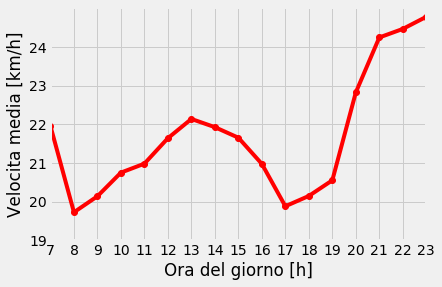

In [9]:
df = pd.DataFrame(vmedia_giorno(tragitti[pre_lock_cond & car_cond], 'Car'), index=range(7, 24), columns=['V. media'])
df.plot(marker='o', legend=False, color='red')
plt.xticks(np.arange(7, 24, 1))
plt.yticks(np.arange(int(min(df.values)), int(max(df.values)) + 1, 1))
plt.xlabel('Ora del giorno [h]')
plt.ylabel('Velocita media [km/h]')
plt.show()